<a href="https://colab.research.google.com/github/tamburins/ESAA-2022-/blob/main/ESAA_11_28(319_341).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 06 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

#### 규제 선형 모델의 개요

- 적절히 데이터에 적합함녀서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 하나, 기존 모델읜 실제값과 예측값의 차이를 최소화하는 RSS를 최소화하는 방향으로만 회귀모델을 설정하여 학습데이터에 지나치게 맞추고 회귀계수가 쉽게 커지며, 변동성이 심하게 커짐

- 이를 반영해 비용함수는 학습데이터의 잔차오류값을 최소로하는 RSS  최소화방법과 과적합방지를 위한 방법이 균형을 이루도록 해야함

### 비용함수목표 = MIn(RSS(W) + alpha * | W | 22)

- alpha는 학습데이터 적합정도와 회귀계수 값의 크기제어를 수행하는 튜닝파라미터로 매우 작은 값이거나 0일경우 비용함수식은 기존과 동일하나, 무한대로 크거나 매우 큰 값일 경우 cost가 최소화되는 비용함수 목표를 달성하게 되어 학습데이터 적합을 더 개선할 수 있음

- 이렇게 비용함수에 alpha 값으로 페널티를 부여해 회귀계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제(regrularization)이라 하며, 앞선 예시처럼 W의 제곱에 대해 페널티를 부과하는 방식을 L2 규제, 절댓값에 대해 페널티를 부과하는 것을 L1규제라 하며 영향력이 크지 않은 회귀계수 값을 0으로 변환

#### 릿지회귀

In [ ]:
# 보스턴주택가격데이터
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#boston dataset load
boston = load_boston()

#transform boston dataset to Dataframe
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# target = 주택가격격, add it to PRICSE column
bostonDF['PRICE'] = boston.target
print('size of Boston dataset', bostonDF.shape)
bostonDF.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state = 156)


size of Boston dataset (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha = 10,  ridge regression
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
rmse_scores =np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('S folds의 개별 negative MSE scores: ', np.round(neg_mse_scores, 3))
print('S folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('S folds의 avg RMSE scores: {0:.3f}', format(avg_rmse))

S folds의 개별 negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
S folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
S folds의 avg RMSE scores: {0:.3f} 5.518166280868968


In [ ]:
#ridge's avg rmse = 5.524
# better than no regulation linear regression's avg rmse
# change the alpha of ridge (0,0.1,1,10,100)
#define alpha parameters
alphas = [0,0.1,1,10,100]
#retry alpha list, get avg rmse in that alpha
for alpha in alphas:
  ridge = Ridge(alpha= alpha)
  #with cross_val_score, calculate avg RMSE of 5 folds
  neg_mse_scores = cross_val_score(ridge,X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0} 일떄떄 5folds의 avg rmse: {1:.3f}'.format(alpha, avg_rmse))
  

alpha 0 일떄떄 5folds의 avg rmse: 5.829
alpha 0.1 일떄떄 5folds의 avg rmse: 5.788
alpha 1 일떄떄 5folds의 avg rmse: 5.653
alpha 10 일떄떄 5folds의 avg rmse: 5.518
alpha 100 일떄떄 5folds의 avg rmse: 5.330


<function matplotlib.pyplot.show(*args, **kw)>

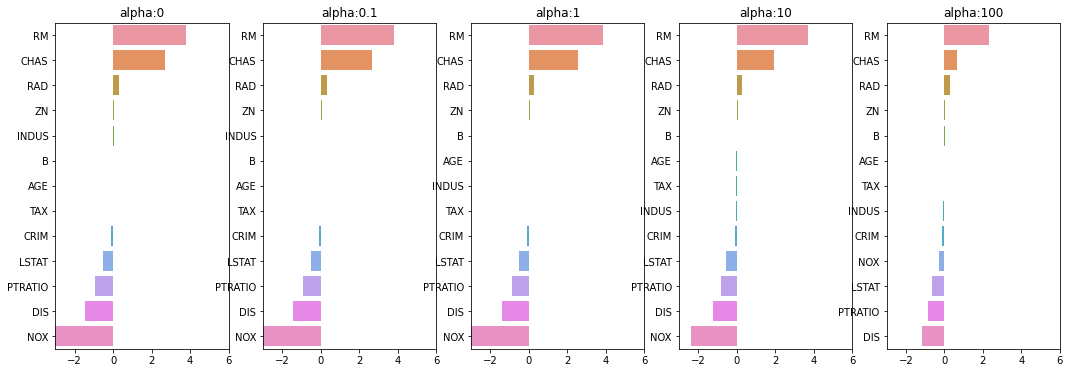

In [ ]:
# visualize feature's coeff with graph
# for visualizing each coef in each alpha, create matplotlib axis with 5 columns
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# create DataFrame for saving each coef in each alpha
coeff_df = pd.DataFrame()

#type alpha list so visualize and save data. pos for getting location
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)
  # transform coef to Series and add Dataframe's column
  coeff =pd.Series(data=ridge.coef_, index=X_data.columns)
  colname ='alpha:'+str(alpha)
  coeff_df[colname] = coeff
  # visualize coeff with bar chart.ascending false
  coeff = coeff.sort_values(ascending = False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3, 6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

#out of for, matplotlib show and show coeff with dataframe
plt.show

In [ ]:
# alpha's change and ridge regression coef
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


#### 라쏘 회귀

- W의 절대값에 페널티를 부여하는 L1규제를 선형회귀에 적용한 것으로 라쏘비용함수의 목표는 RSS(W)+ alpha |W |1식의 최소화하는 W를 찾는 것이 목표

- L2 규제가 회귀계수의 크기를 감소시키는데 반해 L! 규제는 불필요한 회귀계수를 급격하게 감소시켜 0으로 만들고 제거하여 적절한 피처만 회귀에 포함시키는 피처선택의 특성을 보임

- 알파값을 변화시키며 RMSE와 피처의 회귀계수 출력

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# print avg RMSE of regression model in each alpha
# and transform coef to DataFrame

from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print('####### ', model_name, '#######')
    for param in params:
      if model_name == 'Ridge': model = Ridge(alpha=param)
      elif model_name == 'Lasso': model = Lasso(alpha=param)
      elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
      neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                         scoring="neg_mean_squared_error", cv=5)
      avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
      print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
      # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
      model.fit(X_data, y_target)

      # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
      coeff = pd.Series(data=model.coef_, index=X_data.columns)
      colname = 'alpha:'+str(param)
      coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [ ]:
# lasso에에 사용될될 alpha 정의의 get linear reg eval 호출출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [ ]:
# 반환은 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 dataframe 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#alpha크기가 증가함에 따라 일부 피처의 회귀계수는 아예 0
# NOX는 0.07부터 아예 0인 등 피처 선택의 효과

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


#### 엘라스틱넷 회귀

: L2, L1 규제를 결합한 것으로 알파가 두개있는 경우에서 함수값을 최소화할 W를 구하는 것

- 상관관계가 높은 피처들에 대해 중요 피처만을 셀렉하고 나머지를 0으로 만들어 alpha값에 따라 회귀계수가 급격히 변동할 수 있어 L2 규제를 추가한 것으로 수행시간이 오래걸림

- ElasticNet으로 구현하며 주요 생성파라미터는 alpha와 l1_ratio로 a는 l1규제의 알파,b는 l2규제의 알파로 l1_ratio는 a/a+b. l1 ratio가 0이면 a가 0으로 l2규제만 적용될때와 동일

In [ ]:
#l1 ratio를 고정하여 엘라스틱넷 알파값을 변환시키며 rmse와 피처계수를 살펴보자
#엘라스틱넷에 사용될 알파파라미터의 값들을 정의하고 get linear reg eval 함수 호출
elastic_alphas = [ 0.07, 0.1, 0.5,1,3 ]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)


#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [ ]:
# 반환된 coeff_elsatsic df 를 첫번째 칼럼순내림차순 정렬, 회귀계수 df 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

#alpha 0.5 = best rmse!

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


#### 선형회귀모델을 위한 데이터 변환

- 피처와 타겟값간의 선형의 관계가 있다 가정하여 최적의 선형함수를 찾아 결과값을 예측하며 정규분포 형태를 매우 선호하여 왜곡될 경우 예측 성능에 부정적인 영향. 피처값 또한 마찬가지로 스케일링 및 정규화 작업을 수행하는 것이 일반적. 하지만 한다고 해서 무조건 예측 성능이 개선되는건 아님

-  데이터 변환 작업
> stadardscaler 클래스를 이용하여 평균0, 분산1인 표준 정규분포를 가진 데이터세트로 변환하거나 mnmaxscaler를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화 진행

> 스케일링/정규호를 수행한 데이터세트에 다시 다항특성을 적용하여 변환하는 방법으로 1이 안되면 이걸로 다시 변환

> log 변환시 많이 정규분포로 바뀜. 

- target의 경우 비교적 log 변환을 많이 사용하며, 이를 위해 변환방법을 인자로 받아 변환 셋 중 선택하여 변환을 진행하는 get scaled data 함수 생성 .





In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

#method는 표준정규분포변환, 최대 최소값 정규화, 로그변환 결정
#p_degree는 다항식 특성을 추가할 때 적용, p_degree는 2이상 부여하지 않음
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MInMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [ ]:
#get_linear_reg_eval
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [ ]:
#릿지의 알파를 다르게 적용 다양한 데어터 변환방법에 대한 rmse 추출
alphas = [0.1,1,10,100]

#5개 방식으로 변환. 먼저 원본 그대로, 표준정규분포 분포, 펴준 정규분포 + 다항식 특성
# 최대최소 정규화, 최대최소 정규화+다항식 특성, 로그변환
scale_methods = [(None, None),('Stadard', None),('Standard', 2),
              ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Stadard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 9.141 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 8.938 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 10.556 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 10.566 

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 

- 표준정규분포로 변환 후 2차 다항식 변환을 했을 때, 최대최소변환 후 2차다항식 변환을 했을 떄 성능이 개선되었으나 이는 피처개수가 많을 경우 적용하기 힘는 등 한계 존재

- 반면 로그는 모두 좋은 성능 향상 존재

### 07 로지스틱 회귀

- 선형회귀 방식을 분류에 적용한 것으로 독립변수가 아닌 가중치변수가 선형인지 아닌지를 따르는 것으로 시그모읻 함수 최적선을 찾고 시그모읻 함수의 반환값을 확률로 간주해 확률에 따라 분류를 결정

- 많은 자연현상에서 선형 회귀보다 좀 더 명확하게 분류할 수 있음

In [ ]:
#위스콘신 유방암 데이터로 해보자
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()


In [ ]:
#split data and classify with logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#standardsclaer()로 평균0 분산1의 데이터분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target,
                                                    test_size=0.3, random_state=0)


In [ ]:
# with logist regression get roc-auc and accuracy score
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_auc 측정
print('accuracy: {0:.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc: {0:.3f}'.format(roc_auc_score(y_test,lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [ ]:
# 로지스틱 회귀의 주요 하이퍼파라미터 - penalty로 규제 선택, c는 알파의 역수(클수록 규제가 약함)
from sklearn.model_selection import GridSearchCV
params = {'penalty':['l2', 'l1'], 'C':[0.01, 0.1, 1,1,5,10]}
grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('best params: {0}, best avg accuracy{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))


best params: {'C': 1, 'penalty': 'l2'}, best avg accuracy0.975


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

### 08 회귀 트리

- 트리기반의 회귀는 회귀트리를 이용하는 것으로 회귀를 위한 트리를 생성하고 이를 기반으로 회귀를 예측하는 것으로 리프 노드에 속한 데이터값의 평균값을 구해 회귀예측값을 계산함.

- 리프 노드 생성기주에 부합하는 트리분할이 완료되면 노드에 소속된 데이터 값의 평균값을 구해 리프노드의 결정값으로 할당한다는 점에서 차이

- 분류 뿐만 아니라 회귀가 가능하며 사이킷런의 결정트리, 랜덤포레스트, gbm의 cart 기반의 회귀수행을 할 수 있는 estimator 클래스를 제공함



In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

#load boston dataset
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE']= boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state = 0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차검증의 개별 negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 교차검증의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 교차검증의 average MSE scores: {0:.3f}', format(avg_rmse))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

5 교차검증의 개별 negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차검증의 개별 RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
5 교차검증의 average MSE scores: {0:.3f} 4.422538982804892


In [ ]:
#결정트리 gbm xgboost lightgbm의 리그레서를 모두 이용해 주택가격예측
def get_model_cv_predict(model, X_data, y_target):
  neg_rmse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('####', model.__class__.__name__, '####')
  print('5 교차검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리기반의 회귀모델을 반복하면서 평가수행
models=[dt_reg,rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_predict(model, X_data, y_target)

#### DecisionTreeRegressor ####
5 교차검증의 평균 RMSE: 4.423
#### RandomForestRegressor ####
5 교차검증의 평균 RMSE: 4.423
#### GradientBoostingRegressor ####
5 교차검증의 평균 RMSE: 4.423
[09:15:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:15:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:15:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:15:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:15:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#### XGBRegressor ####
5 교차검증의 평균 RMSE: 4.423
#### LGBMRegressor ####
5 교차검증의 평균 RMSE: 4.423


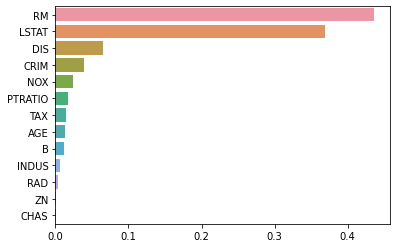

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)

# 앞 예제이서 만들어진 X_data, y_target 데이터세트를 적용해 학습
rf_reg.fit(X_data, y_target)

feature_series =pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


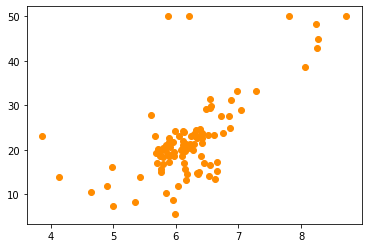

In [ ]:
#회귀트리와 선형회귀의 예측ㅁ방식 비교
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample=bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")


In [ ]:
#maxdepth 변화를 통해 예측값 변화 비교
#선형회귀오 ㅏ결정트리 기반의 regressor 생성, decisiontreeregressor의 max_depth는 2,7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터세트를 4.5-8.5까지의 100개의 데이터셑 로 생ㅅ겅
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

#보스턴 주택가격 데이터에서 시각화를 위해 피처는 rM만만, 그리고고 결정데이터인인 price 추출출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# train n predict
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

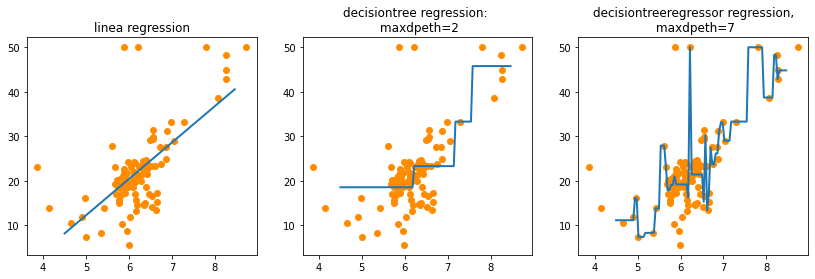

In [ ]:
fig,(ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

#X축값을을 4.5-8.5로로 변환하여여 입력했을을 때때 선형회귀와와 결정트리리 회귀예측선선 시각화화
# 선형회귀로로 학습된된 모델회귀예측선선
ax1.set_title('linea regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label="linear", linewidth=2)

# decisiontreeregressor, maxdepth2 학습된된 모델회귀예측선선
ax2.set_title('decisiontree regression: \n maxdpeth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="maxdepth=3", linewidth=2)

# decisiontreeregressor, maxdepth7 학습된된 모델회귀예측선선
ax3.set_title('decisiontreeregressor regression,\n maxdpeth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="maxdepth=7", linewidth=2)